In [18]:
from numpy import loadtxt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
lncf_hum_res = pd.read_table("meth_lncf_train_lncf/Human_output.txt", sep="  ", engine='python')
lncf_hum_res = lncf_hum_res.drop(['id'], axis = 1)
print len(lncf_hum_res)
actual_hum_res = pd.read_table("meth_lncf_train_cpc2/hum_actual.txt")
print len(actual_hum_res)

lncf_mouse_res = pd.read_table("meth_lncf_train_lncf/Mouse_output.txt", sep="  ", engine='python')
lncf_mouse_res = lncf_mouse_res.drop(['id'], axis = 1)
#print lncf_mouse_res
actual_mouse_res = pd.read_table("meth_lncf_train_cpc2/mouse_actual.txt")

lncf_zebrafish_res = pd.read_table("meth_lncf_train_lncf/ZebraFish_output.txt", sep="  ", engine='python')
lncf_zebrafish_res = lncf_zebrafish_res.drop(['id'], axis = 1)
actual_zebrafish_res = pd.read_table("meth_lncf_train_lncf/ZebraFish_Expected.txt")

lncf_gen_res = pd.read_table("meth_lncf_train_lncf/train_lnc_test_gen.txt", sep="  ", engine='python')
print len(lncf_gen_res)
lncf_gen_res = lncf_gen_res.drop(['id'], axis = 1)
#print lncf_gen_model
actual_gen_res = pd.read_table("meth_lncf_train_cpc2/gen_actual.txt", engine='python')
#print len(actual_gen_res)

lncf_mouse_gen_res = pd.read_table("newGC_Mouse.txt", sep="  ", engine='python')
print len(lncf_mouse_gen_res)
lncf_mouse_gen_res = lncf_mouse_gen_res.drop(['id'], axis = 1)
#print lncf_gen_model
actual_mouse_gen_res = pd.read_table("meth_lncf_train_cpc2/actual_gen_mouse.txt")
print len(actual_mouse_gen_res)

4999
4999
56934
35710
35710


In [20]:
actual_hum_model = pd.get_dummies(actual_hum_res)
lncf_hum_model = pd.get_dummies(lncf_hum_res)

actual_mouse_model = pd.get_dummies(actual_mouse_res)
lncf_mouse_model = pd.get_dummies(lncf_mouse_res)

actual_zebrafish_model = pd.get_dummies(actual_zebrafish_res)
lncf_zebrafish_model = pd.get_dummies(lncf_zebrafish_res)

actual_gen_model = pd.get_dummies(actual_gen_res)
lncf_gen_model = pd.get_dummies(lncf_gen_res)

actual_mouse_gen_model = pd.get_dummies(actual_mouse_gen_res)
lncf_mouse_gen_model = pd.get_dummies(lncf_mouse_gen_res)


In [21]:
y_hum_test = actual_hum_model['label_noncoding']
y_mouse_test = actual_mouse_model['label_noncoding']
y_zebrafish_test = actual_zebrafish_model['label_noncoding']
y_gen_test = actual_gen_model['label_noncoding']
y_mouse_gen_test = actual_mouse_gen_model['label_noncoding']

y_lncf_hum_pred = lncf_hum_model['label_NonCoding']
y_lncf_mouse_pred = lncf_mouse_model['label_NonCoding']
y_lncf_zebrafish_pred = lncf_zebrafish_model['label_NonCoding']
y_lncf_gen_pred = lncf_gen_model['label_NonCoding']
y_lncf_mouse_gen_pred = lncf_mouse_gen_model['label_NonCoding']

In [22]:
#for human
accuracy = accuracy_score(y_hum_test, y_lncf_hum_pred)
print("Accuracy human: %.2f%%" % (accuracy * 100.0))
accuracy = accuracy_score(y_mouse_test, y_lncf_mouse_pred)
print("Accuracy mouse: %.2f%%" % (accuracy * 100.0))
accuracy = accuracy_score(y_zebrafish_test, y_lncf_zebrafish_pred)
print("Accuracy zebrafish: %.2f%%" % (accuracy * 100.0))
accuracy = accuracy_score(y_gen_test, y_lncf_gen_pred)
print("Accuracy gen: %.2f%%" % (accuracy * 100.0))
accuracy = accuracy_score(y_mouse_gen_test, y_lncf_mouse_gen_pred)
print("Accuracy mouse gen: %.2f%%" % (accuracy * 100.0))

Accuracy human: 96.76%
Accuracy mouse: 92.28%
Accuracy zebrafish: 91.80%
Accuracy gen: 89.34%
Accuracy mouse gen: 92.22%


In [ ]:
Accuracy human: 96.76%
Accuracy mouse: 92.28%
Accuracy zebrafish: 91.80%
Accuracy gen: 89.34%
Accuracy mouse gen: 92.22%

In [23]:
from sklearn.metrics import classification_report

target_names = ['class non coding', 'class coding']
print(classification_report(y_hum_test, y_lncf_hum_pred, target_names=target_names))

#target_names = ['class non coding', 'class coding']
print(classification_report(y_mouse_test, y_lncf_mouse_pred, target_names=target_names))

#target_names = ['class non coding', 'class coding']
print(classification_report(y_zebrafish_test, y_lncf_zebrafish_pred, target_names=target_names))

print(classification_report(y_gen_test, y_lncf_gen_pred, target_names=target_names))

print(classification_report(y_mouse_gen_test, y_lncf_mouse_gen_pred, target_names=target_names))

                  precision    recall  f1-score   support

class non coding       0.97      0.97      0.97      2499
    class coding       0.97      0.97      0.97      2500

       micro avg       0.97      0.97      0.97      4999
       macro avg       0.97      0.97      0.97      4999
    weighted avg       0.97      0.97      0.97      4999

                  precision    recall  f1-score   support

class non coding       0.94      0.90      0.92      1800
    class coding       0.90      0.95      0.92      1800

       micro avg       0.92      0.92      0.92      3600
       macro avg       0.92      0.92      0.92      3600
    weighted avg       0.92      0.92      0.92      3600

                  precision    recall  f1-score   support

class non coding       0.93      0.90      0.92      1000
    class coding       0.91      0.93      0.92      1000

       micro avg       0.92      0.92      0.92      2000
       macro avg       0.92      0.92      0.92      2000
    we

In [24]:
from sklearn.metrics import confusion_matrix

cm_hum = confusion_matrix(y_hum_test, y_lncf_hum_pred)
print(cm_hum)
cm_mouse = confusion_matrix(y_mouse_test, y_lncf_mouse_pred)
print(cm_mouse)
cm_zebrafish = confusion_matrix(y_zebrafish_test, y_lncf_zebrafish_pred)
print(cm_zebrafish)
cm_gen = confusion_matrix(y_gen_test, y_lncf_gen_pred)
print(cm_gen)
cm_gen = confusion_matrix(y_mouse_gen_test, y_lncf_mouse_gen_pred)
print(cm_gen)

[[2424   75]
 [  87 2413]]
[[1619  181]
 [  97 1703]]
[[904  96]
 [ 68 932]]
[[23505  4962]
 [ 1109 27358]]
[[16159  1696]
 [ 1083 16772]]


In [25]:
from sklearn.metrics import roc_auc_score

print roc_auc_score(y_hum_test, y_lncf_hum_pred)

print roc_auc_score(y_mouse_test, y_lncf_mouse_pred)

print roc_auc_score(y_zebrafish_test, y_lncf_zebrafish_pred)

print roc_auc_score(y_gen_test, y_lncf_gen_pred)

print roc_auc_score(y_mouse_gen_test, y_lncf_mouse_gen_pred)

0.9675939975990395
0.9227777777777778
0.918
0.8933677591597288
0.9221786614393727


<IPython.core.display.Javascript object>


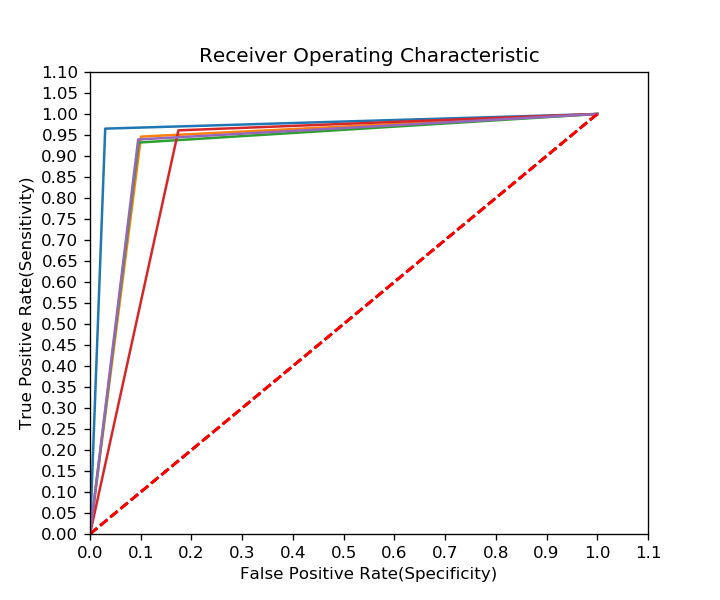

In [26]:
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_hum_test, y_lncf_hum_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1], 'r--')
plt.yticks(np.arange(0.0, 1.2, step=0.05))
plt.xticks(np.arange(0.0, 1.2, step=0.1))
#print(lock, labels)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.autoscale(enable = False, axis = 'both', tight = True)
plt.rcParams['figure.figsize'] = [6, 5]
#print(plt.grid)
#plt.figure(figsize=(20, 10))
plt.show()

In [27]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_mouse_test, y_lncf_mouse_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1], 'r--')
plt.yticks(np.arange(0.0, 1.2, step=0.05))
plt.xticks(np.arange(0.0, 1.2, step=0.1))
#print(lock, labels)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.autoscale(enable = False, axis = 'both', tight = True)
plt.rcParams['figure.figsize'] = [6, 5]
#print(plt.grid)
#plt.figure(figsize=(20, 10))
plt.show()

In [28]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_zebrafish_test, y_lncf_zebrafish_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1], 'r--')
plt.yticks(np.arange(0.0, 1.2, step=0.05))
plt.xticks(np.arange(0.0, 1.2, step=0.1))
#print(lock, labels)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.autoscale(enable = False, axis = 'both', tight = True)
plt.rcParams['figure.figsize'] = [6, 5]
#print(plt.grid)
#plt.figure(figsize=(20, 10))
plt.show()

In [29]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_gen_test, y_lncf_gen_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1], 'r--')
plt.yticks(np.arange(0.0, 1.2, step=0.05))
plt.xticks(np.arange(0.0, 1.2, step=0.1))
#print(lock, labels)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.autoscale(enable = False, axis = 'both', tight = True)
plt.rcParams['figure.figsize'] = [6, 5]
#print(plt.grid)
#plt.figure(figsize=(20, 10))
plt.show()

In [30]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_mouse_gen_test, y_lncf_mouse_gen_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1], 'r--')
plt.yticks(np.arange(0.0, 1.2, step=0.05))
plt.xticks(np.arange(0.0, 1.2, step=0.1))
#print(lock, labels)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.autoscale(enable = False, axis = 'both', tight = True)
plt.rcParams['figure.figsize'] = [6, 5]
#print(plt.grid)
#plt.figure(figsize=(20, 10))
plt.show()